In [ ]:
from google.colab import files

token = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!rm -r /content/sample_data
!kaggle competitions download -c vacanciesru
!unzip vacanciesru.zip && rm vacanciesru.zip

100% 2.98G/2.98G [00:36<00:00, 75.0MB/s]
100% 2.98G/2.98G [00:36<00:00, 88.2MB/s]
Archive:  vacanciesru.zip
  inflating: vacancies_2003.csv      
  inflating: vacancies_2004.csv      
  inflating: vacancies_2005.csv      
  inflating: vacancies_2006.csv      
  inflating: vacancies_2007.csv      
  inflating: vacancies_2008.csv      
  inflating: vacancies_2009.csv      
  inflating: vacancies_2010.csv      
  inflating: vacancies_2011.csv      
  inflating: vacancies_2012.csv      
  inflating: vacancies_2013.csv      
  inflating: vacancies_2014.csv      
  inflating: vacancies_2015.csv      
  inflating: vacancies_2016.csv      
  inflating: vacancies_2017.csv      
  inflating: vacancies_2018.csv      
  inflating: vacancies_2019.csv      
  inflating: vacancies_2020.csv      


In [ ]:
import os
import re
import itertools
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

datasets = {}
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        file_reg = re.match(r"vacancies_[0-9]{4}.csv", filename)
        year_reg = re.search(r"[0-9]{4}", filename)
        if file_reg:
            datasets[int(year_reg.group())] = os.path.join(dirname, filename)

/content/vacancies_2010.csv
/content/vacancies_2018.csv
/content/vacancies_2003.csv
/content/vacancies_2019.csv
/content/vacancies_2016.csv
/content/vacancies_2005.csv
/content/vacancies_2006.csv
/content/vacancies_2011.csv
/content/vacancies_2014.csv
/content/vacancies_2020.csv
/content/vacancies_2017.csv
/content/vacancies_2004.csv
/content/vacancies_2013.csv
/content/vacancies_2007.csv
/content/vacancies_2012.csv
/content/vacancies_2015.csv
/content/vacancies_2009.csv
/content/vacancies_2008.csv
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/active_config
/content/.config/logs/2024.02.02/14.52.48.593561.log
/content/.config/logs/2024.02.02/14.53.24.678689.log
/content/.config/logs/2024.02.02/14.53.00.809969.log
/content/.config/logs/2024.02.02/14.53.23.750833.log
/content/.config/logs/2024.02.02/14.53

## Посмотрим на данные за 2020 год

In [ ]:
df_2020 = pd.read_csv(datasets[2020])

In [ ]:
df_2020

,id,description,key_skills,schedule_id,schedule_name,accept_handicapped,accept_kids,experience_id,experience_name,specializations,...,address_lng,alternate_url,apply_alternate_url,code,department_id,department_name,employment_id,employment_name,prof_classes_found,terms_found
0,30711158,<p><strong>О Компании</strong></p> <p>Мы помог...,NaN,fullDay,Полный день,False,False,between1And3,От 1 года до 3 лет,1.117 Тестирование 1 Информационные технологии...,...,82.930086,https://hh.ru/vacancy/30711158,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,tester,jmeter спринт тестировщик continuous_integrati...
1,30711538,<p><strong>Vigrom</strong> сегодня – междунаро...,PHP\nSQL\nООП\nPostgreSQL\nMemcached\nSymfony\...,fullDay,Полный день,False,False,between1And3,От 1 года до 3 лет,"1.221 Программирование, Разработка 1 Информаци...",...,45.005847,https://hh.ru/vacancy/30711538,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,programmer,современный_офис memcache team phpunit php арх...
2,30713109,<p>Каждый день миллионы пользователей находят ...,NaN,remote,Удаленная работа,True,False,noExperience,Нет опыта,4.278 Сотрудник call-центра 4 Административный...,...,NaN,https://hh.ru/vacancy/30713109,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,part,Частичная занятость,operator,яндекс windows_7 гибкий_график
3,30714567,<p><strong>В твоих руках - отличная возможност...,NaN,fullDay,Полный день,False,False,noExperience,Нет опыта,"17.269 Телекоммуникации, Сетевые решения 17 Пр...",...,61.401188,https://hh.ru/vacancy/30714567,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,prodajnik,медицинская_страховка официальное_трудоустройс...
4,30716168,<p><strong>Компания «Северсталь-Инфоком» - цен...,Bash\nPowerShell\nC++\nC#\nJava\nPerl\nPython\...,fullDay,Полный день,False,False,between1And3,От 1 года до 3 лет,"1.221 Программирование, Разработка 1 Информаци...",...,37.877356,https://hh.ru/vacancy/30716168,https://hh.ru/applicant/vacancy_response?vacan...,NaN,severstal-6041-it,Северсталь. ИТ Компания,full,Полная занятость,consultant,bash team c# perl английский_язык тестирование...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587632,29701878,<p><strong>LС Group </strong>– продуктовая IT-...,NaN,fullDay,Полный день,False,False,between3And6,От 3 до 6 лет,1.395 Банковское ПО 1 Информационные технологи...,...,83.098521,https://hh.ru/vacancy/29701878,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,data_scientist,машинное_обучение team английский_язык intel с...
587633,29703872,<p><em>Мы помогаем владельцам малого и среднег...,NaN,fullDay,Полный день,False,False,noExperience,Нет опыта,"1.225 Продажи 1 Информационные технологии, инт...",...,49.104222,https://hh.ru/vacancy/29703872,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,prodajnik,менеджер_по_продажам kpi skype ms_excel ms_off...
587634,29704859,<p>Компания PricewaterhouseCoopers (PwC) реали...,1C: Бухгалтерия\n1С: Предприятие 8\n1С: Управл...,fullDay,Полный день,True,False,moreThan6,Более 6 лет,"1.221 Программирование, Разработка 1 Информаци...",...,49.110879,https://hh.ru/vacancy/29704859,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,programmer,1c высшее_образование http team разработчик мо...
587635,29707339,<p><strong>Grow Food готовит и доставляет здор...,NaN,fullDay,Полный день,False,False,between3And6,От 3 до 6 лет,1.327 Управление проектами 1 Информационные те...,...,30.398181,https://hh.ru/vacancy/29707339,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,owner,site crm разработчик business_intelligence ux ...


In [ ]:
del df_2020

## Востребованность специалистов за выбранный год

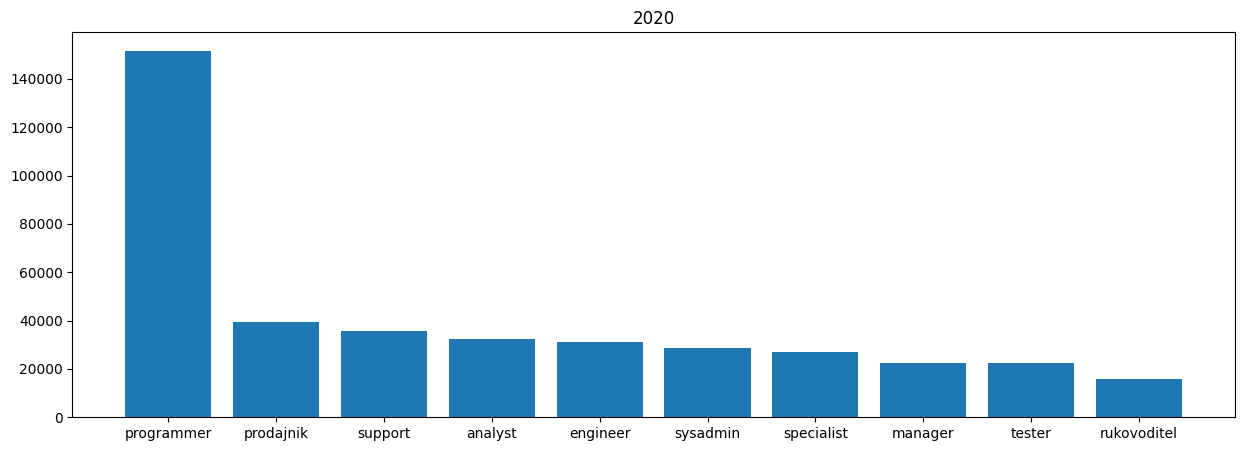

In [ ]:
#@markdown ###Выберите год
year= 2020 #@param {type:"slider", min:2003, max:2020, step:1}
use_cols = ['prof_classes_found']

year_col = []
for i in range(len(pd.read_csv('vacancies_' + str(year)+ '.csv'))):
  year_col.append(year)

df = pd.concat([
     pd.read_csv(
            datasets[year],
            usecols=use_cols),
            pd.DataFrame(year_col, columns=['Year'])],
            axis=1)

d = []
top_10_prof_in_df = [i[0] for i in list(dict(df.value_counts()[0:10]).keys())]

for i, ind in zip(top_10_prof_in_df, range(len(df.value_counts()[0:10]))):
   d.append([i, df.value_counts()[0:10].values[ind]])

d = pd.DataFrame(d, columns = ['prof', 'count'])

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(d['prof'].values, d['count'].values)
ax.set_title(year)

plt.show()

Вспомогательные функции

In [ ]:
def count_freq_by_year(df, year, col):
    key_skills = df[col].fillna('').apply(lambda row: row.split("\n")).values
    skills_list = itertools.chain.from_iterable(key_skills)
    skills_list = filter(lambda val: val != "", skills_list)
    count_skills = Counter(skills_list)
    sort_count_skills = sorted(count_skills.items(), key=lambda item: item[1], reverse=True)
    skill_with_freq = pd.DataFrame(sort_count_skills, columns=['Навык', year])
    skill_with_freq = skill_with_freq.set_index('Навык')
    return skill_with_freq

def visualization_stat(df, N=10):
    df = df.sort_values(df.columns[-1], ascending=False)
    for_plot = df[:N].transpose()
    for_plot.plot(figsize=(10,5))
    plt.legend(loc='right')

## Визуализирую востребованность специалистов за все годы

CPU times: user 3min 20s, sys: 13.2 s, total: 3min 33s
Wall time: 4min 26s


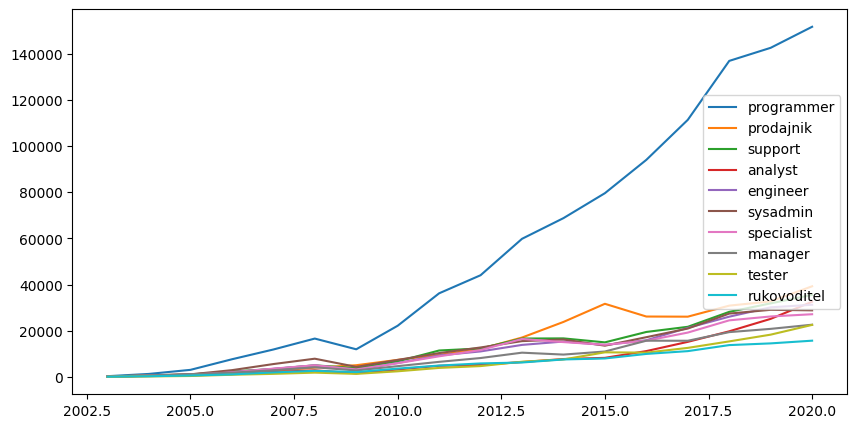

In [ ]:
%%time
period = 2003, 2021
use_cols = ['prof_classes_found']
df = pd.DataFrame()
for year in range(*period):
    df = pd.concat([
        df,
        count_freq_by_year(
          pd.read_csv(
            datasets[year],
            usecols=use_cols
          ),
          year,
          'prof_classes_found'
        )
    ], axis=1)
visualization_stat(df, N=10)

Самыми востребованными оказались программисты. Также можно заметить, что примерно с 2010 года кол-во предложений начало стремительно расти

## Посмотрим следующую десятку

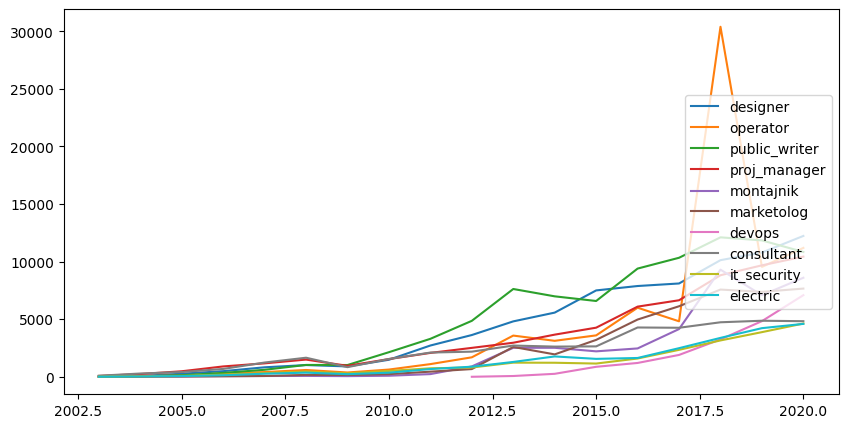

In [ ]:
period = 2003, 2021
use_cols = ['prof_classes_found']
df = pd.DataFrame()
for year in range(*period):
    df = pd.concat([df, count_freq_by_year(pd.read_csv(datasets[year], usecols=use_cols), year, 'prof_classes_found')],axis=1)
first_top_10 = df.transpose().sum().sort_values(ascending=False).index[:10]
visualization_stat(df.drop(index = first_top_10), N=10)

## Ключевые скилы

CPU times: user 3min 24s, sys: 13.7 s, total: 3min 38s
Wall time: 4min 20s


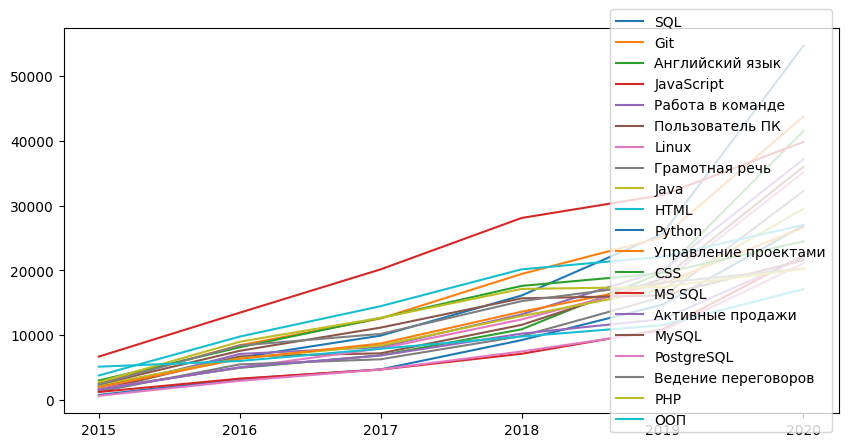

In [ ]:
%%time
period = 2003, 2021
use_cols = ['key_skills']
df = pd.DataFrame()
for year in range(*period):
    df = pd.concat([
      df,
      count_freq_by_year(
        pd.read_csv(
          datasets[year],
          usecols=use_cols
        ),
        year,
        'key_skills'
      )
    ],axis=1)

visualization_stat(df, N=20)

В основном преобладают навыки необходимые для работы в IT области.

## Посмотрим как изменялись нижняя и верхняя границы заработных плат по годам

<Axes: xlabel='year'>

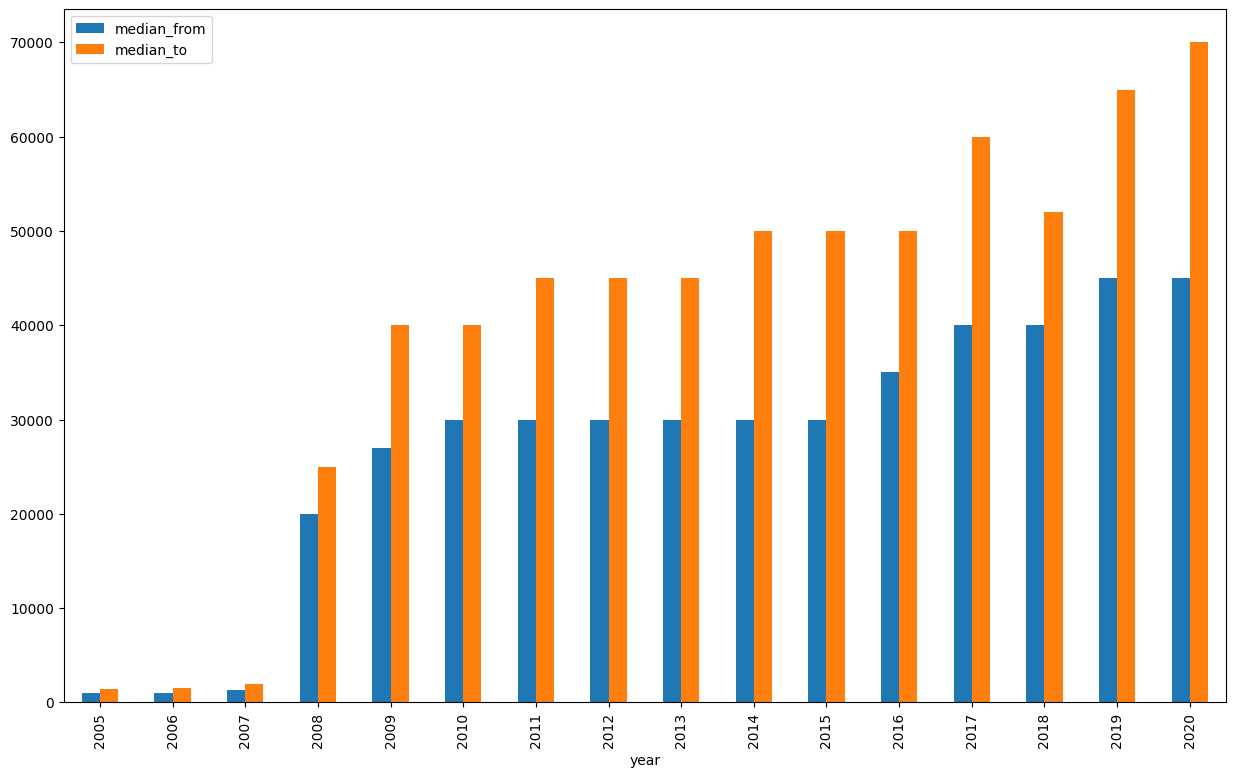

In [ ]:
period = 2005, 2021
use_cols = ['salary_from', 'salary_to']
df = pd.DataFrame(columns=['year', 'median_from', 'mean_from', 'median_to', 'mean_to'])
for year in range(*period):
    year_df = pd.read_csv(datasets[year], usecols=use_cols)
    median = year_df.median()
    mean = year_df.mean()
    df.loc[len(df)] = [year, int(median['salary_from']), int(mean['salary_from'],), int(median['salary_to']), int(mean['salary_to'])]
    del year_df, median, mean
df.plot(x='year', y=['median_from', 'median_to'], kind='bar', figsize = (15,9))

<Axes: xlabel='year'>

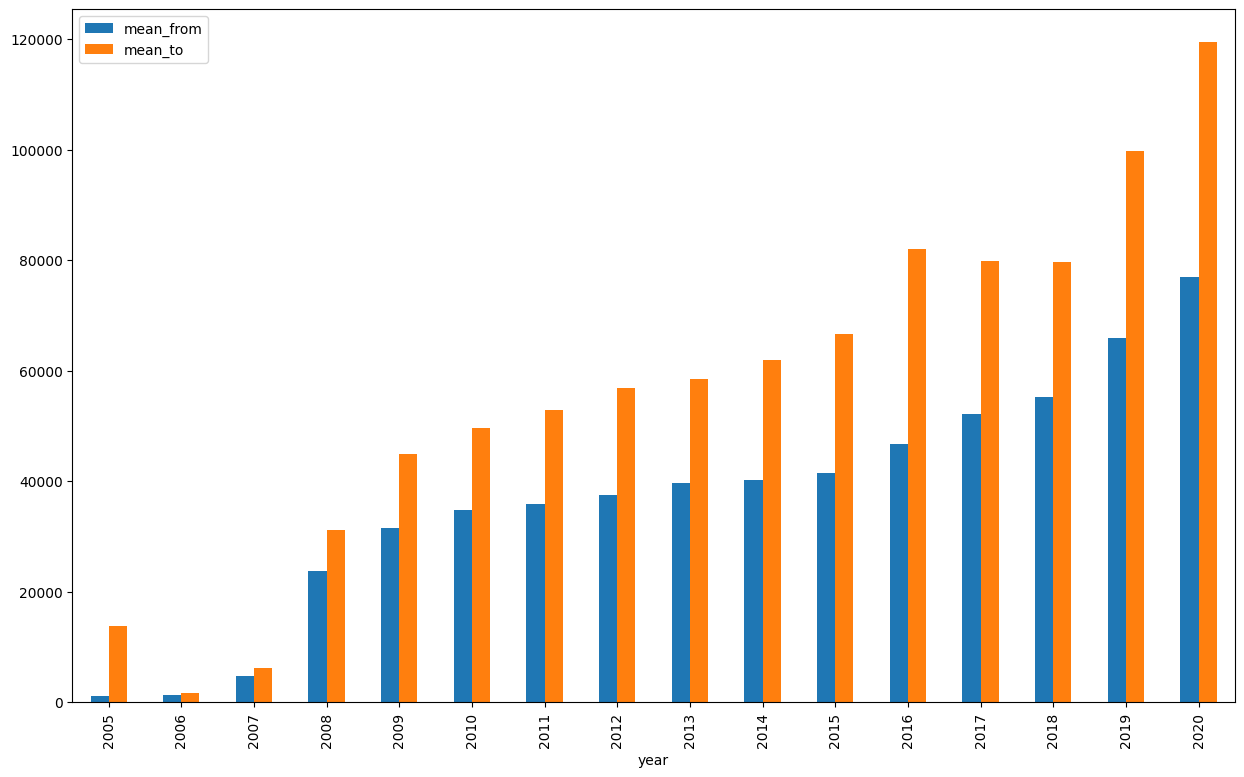

In [ ]:
df.plot(x='year', y=['mean_from', 'mean_to'], kind='bar', figsize = (15,9))

В целом уровень зарплаты имеет тенденцию к росту. Уровень з/п с 2005 по 2007 выглядит странно. Посмотрим на это более детально

In [ ]:
df = pd.DataFrame()
for year in range(2005, 2008):
    df = pd.concat([df,
                    pd.read_csv(datasets[year])],
                    axis=0)

<ipython-input-36-b1c31a235c2b>:4: DtypeWarning: Columns (27,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(datasets[year])],


In [ ]:
df.groupby(['area_name','schedule_name'])['salary_to'].agg(['min', 'mean', 'median', 'max', 'count']).sort_values(by=['count'], ascending=False)[0:20]

,,min,mean,median,max,count
area_name,schedule_name,,,,,
Москва,Полный день,1.0,6636.604109,1600.0,100000000.0,41711
Санкт-Петербург,Полный день,1.0,3572.163128,1500.0,150000.0,4757
Киев,Полный день,1.0,1222.743243,1000.0,15000.0,888
Россия,Полный день,70.0,3640.174581,2500.0,125000.0,716
Нижний Новгород,Полный день,1.0,3388.542773,1000.0,60000.0,678
Казань,Полный день,200.0,2840.590909,750.0,65000.0,462
Алматы,Полный день,96.0,9894.512563,1300.0,350000.0,398
Екатеринбург,Полный день,250.0,4899.010152,1200.0,70000.0,394
Новосибирск,Полный день,300.0,4454.111465,1500.0,60000.0,314


In [ ]:
df.groupby(['area_name','schedule_name'])['salary_from'].agg(['min', 'mean', 'median', 'max', 'count']).sort_values(by=['count'], ascending=False)[0:20]

,,min,mean,median,max,count
area_name,schedule_name,,,,,
Москва,Полный день,1.0,3511.037833,1300.0,600000.0,41181
Санкт-Петербург,Полный день,1.0,3121.490792,1000.0,500000.0,5267
Киев,Полный день,1.0,802.337728,600.0,10000.0,986
Нижний Новгород,Полный день,1.0,2315.970936,600.0,50000.0,929
Россия,Полный день,1.0,2747.913793,1600.0,100000.0,696
Екатеринбург,Полный день,100.0,4955.734783,960.0,75000.0,690
Казань,Полный день,10.0,1898.723077,500.0,50000.0,585
Новосибирск,Полный день,100.0,4661.579710,1000.0,57000.0,552
Алматы,Полный день,80.0,6072.824074,800.0,140000.0,432


Для крупных городов при полном рабочем дне уровень зарплаты выглядит еще страннее. Возможно он указан в долларах. Также смущают минимальные значения равные единице, но возможно в этом есть своя логика (или нет)

## Допуски

<Axes: title={'center': 'Разрешена удаленная работа'}, xlabel='year'>

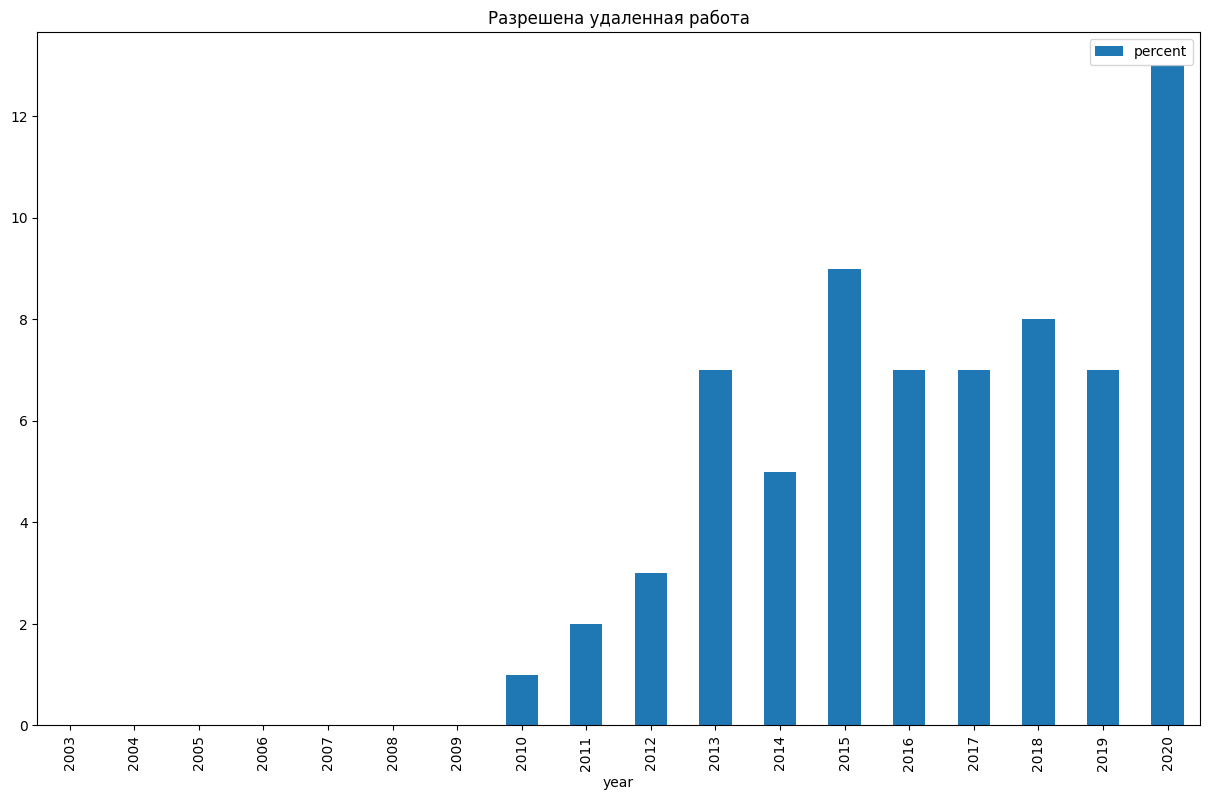

In [ ]:
period = 2003, 2021
use_cols = ['schedule_id']
df = pd.DataFrame(columns=['year', 'percent'])
for year in range(*period):
    year_df = pd.read_csv(datasets[year], usecols=use_cols)
    count = year_df.count()
    year_df = year_df[year_df['schedule_id'] == 'remote']
    result = len(year_df)*100/count
    df.loc[len(df)] = [year, int(result)]
    del year_df
df.plot(x='year', y='percent', kind='bar', title='Разрешена удаленная работа', figsize = (15,9))

- Вакансии с удаленным форматом работы начали появляться с 2010 года и имели тенденцию к росту
- В 2020 заметно резкое увеличение кол-ва таких вакансий, что скорее всего связано с коронавирусом

<Axes: title={'center': 'Можно работать инвалидам'}, xlabel='year'>

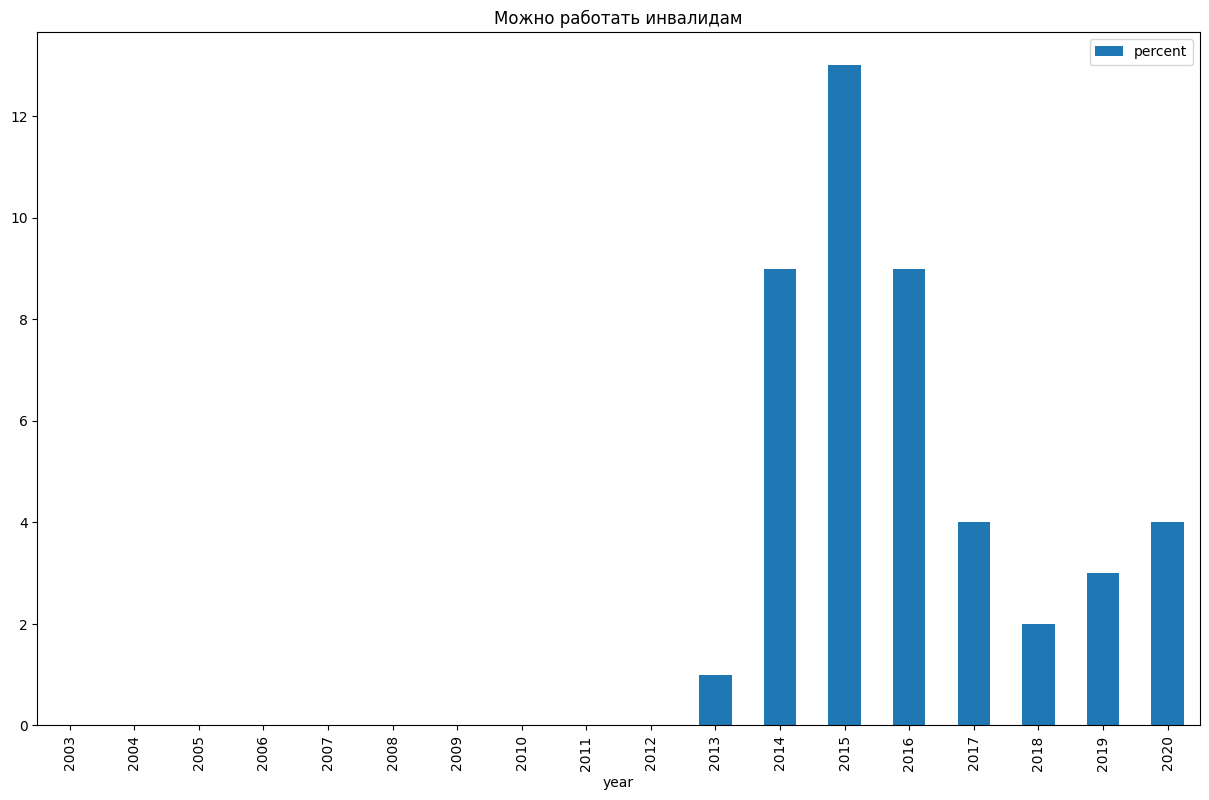

In [ ]:
period = 2003, 2021
use_cols = ['accept_handicapped']
df = pd.DataFrame(columns=['year', 'percent'])
for year in range(*period):
    year_df = pd.read_csv(datasets[year], usecols=use_cols)
    count = year_df.count()
    year_df = year_df[year_df['accept_handicapped'] == True]
    result = len(year_df)*100/count
    df.loc[len(df)] = [year, int(result)]
    del year_df
df.plot(x='year', y='percent', kind='bar', title='Можно работать инвалидам', figsize = (15,9))

- Впервые вакансии с допуском на работу инвалидов появились в 2013
- Больше всего таких вакансий наблюдалось в 2015

## Валюты

None


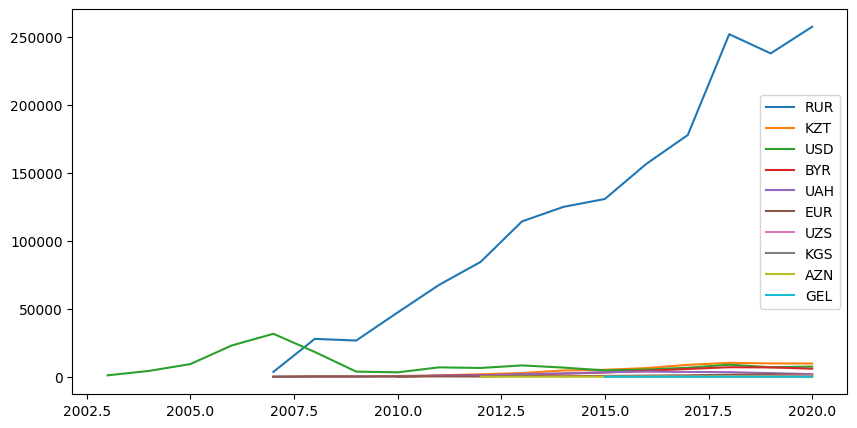

In [ ]:
period = 2003, 2021
use_cols = ['salary_currency']
df = pd.DataFrame()
for year in range(*period):
    df = pd.concat([df, count_freq_by_year(pd.read_csv(datasets[year], usecols=use_cols), year, 'salary_currency')],axis=1)
print(visualization_stat(df, N=20))

C 2003 по 2006 зарплаты были только в долларах, после доминировал рубль.

# Кластеризация

In [ ]:
import nltk
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
from nltk.corpus import stopwords

df = pd.read_csv("/content/vacancies_2020.csv").sample(100_000)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
# Убираем htmp-тэги, переносы строк и многочисленные пробелы
CLEANR = re.compile('<.*?>')

def cleanhtml(text):
  cleantext = re.sub(CLEANR, '', text)
  cleantext = cleantext.replace('\n', ' ')

  for i in range(2, 11):
    cleantext = cleantext.replace(i*' ', ' ')

  return cleantext

In [ ]:
cols = ['description', 'key_skills', 'name']

df = df[cols]

for col in cols:
  df[col] = df[col].fillna('')
  df[col] = df[col].apply(cleanhtml)

df

,description,key_skills,name
543473,Обязанности: Участие в разработке технико-комм...,Управление проектами Формирование бюджета Прое...,Руководитель проектов (связь)
10674,Каждый день миллионы пользователей находят отв...,Грамотность Высокая скорость печати Работа с б...,Специалист службы поддержки пользователей
11713,Крупная российская компания - производитель на...,VBA Математический анализ Анализ данных Аналит...,Аналитик
488300,Обязанности: разработка и выполнение проектной...,,Инженер-проектировщик систем «Умный дом»
365903,Задачи: В этой роли вы будете привлекать и по...,,Key Account Manager (Logistics)
...,...,...,...
192079,Профессиональные навыки: Хорошее знание теори...,,Разработчик Python
163429,Возможен удаленный формат сотрудничества. Прое...,Python Django Framework Git PostgreSQL Flask T...,Python разработчик
86926,Компания &quot;Первый Визовый Центр&quot; явля...,jQuery JavaScript MySQL Ajax CSS Bootstrap ООП...,Web - программист
25105,Студия Олега Чулакова — дизайн-студия № 1 в Ро...,Adobe After Effect,Моушен дизайнер


In [ ]:
!pip install nltk
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=a9caeed8e3fccda7fb14546774eb4e3ed3a7f7b019e48af5cd74672198b6f2da
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import umap.umap_ as umap

## Кластеризация по названию вакансии


In [ ]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('russian') + stopwords.words('english'))
text_matrix = vectorizer.fit_transform(df['name'])

svd = TruncatedSVD(n_components=50, random_state=42)
text_matrix_svd = svd.fit_transform(text_matrix)

UMAP = umap.UMAP(n_components=2, random_state=42)
text_matrix_umap = UMAP.fit_transform(text_matrix_svd)

kmeans = KMeans(n_clusters=5, random_state=42)
df['name_cluster'] = kmeans.fit_predict(text_matrix_umap)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


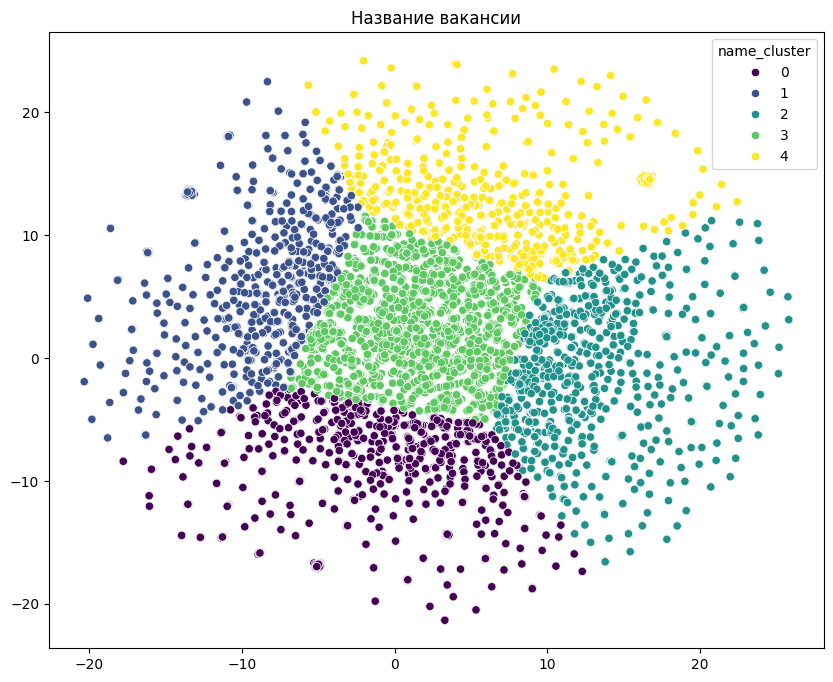

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=text_matrix_umap[:, 0], y=text_matrix_umap[:, 1], hue=df['name_cluster'], palette='viridis', legend='full')
plt.title('Название вакансии')
plt.show()

In [ ]:
for cluster_id in range(5):
    sample_vacancies = df[df['name_cluster'] == cluster_id]
    print(f'\nКластер №{cluster_id}:')
    print(sample_vacancies['name'].sample(5))
    print(f"Длина: {len(sample_vacancies['name'])}")


Кластер №0:
505515         Web-мастер / Web-программист
539529    Региональный менеджер по продажам
50799            Менеджер по продажам услуг
76054                           QA Engineer
99468                  Менеджер по продажам
Name: name, dtype: object
Длина: 17751

Кластер №1:
47811                                        Телемаркетолог
12086                                      Разработчик ABAP
545200                       Специалист по сопровождению ПО
177405    Продавец-консультант (сеть салонов сотовой свя...
160823     Ведущий системный администратор (г. Красногорск)
Name: name, dtype: object
Длина: 16227

Кластер №2:
62621                               Инженер-программист
197854                 Специалист технической поддержки
351858                               Frontend Developer
144802                    Менеджер по продажам франшизы
417374    Разработчик back-end / front-end / full-stack
Name: name, dtype: object
Длина: 18600

Кластер №3:
455751    Консультант системи M

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_text_matrix_umap = scaler.fit_transform(text_matrix_umap)
outliers = df[scaler.inverse_transform(scaled_text_matrix_umap) > 3].index

df.loc[outliers, 'name']

543473                   Руководитель проектов (связь)
120991                                 PHP программист
120991                                 PHP программист
231375    Эксперт по аналитике эффективности магазинов
231375    Эксперт по аналитике эффективности магазинов
                              ...                     
163429                              Python разработчик
86926                                Web - программист
86926                                Web - программист
25105                                  Моушен дизайнер
520914                          Full stack разработчик
Name: name, Length: 95374, dtype: object

## Кластеризация по описанию вакансии

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('russian') + stopwords.words('english'))
text_matrix = vectorizer.fit_transform(df['description'])

svd = TruncatedSVD(n_components=50, random_state=42)
text_matrix_svd = svd.fit_transform(text_matrix)

UMAP = umap.UMAP(n_components=2, random_state=42)
text_matrix_umap = UMAP.fit_transform(text_matrix_svd)

kmeans = KMeans(n_clusters=5, random_state=42)
df['description_cluster'] = kmeans.fit_predict(text_matrix_umap)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


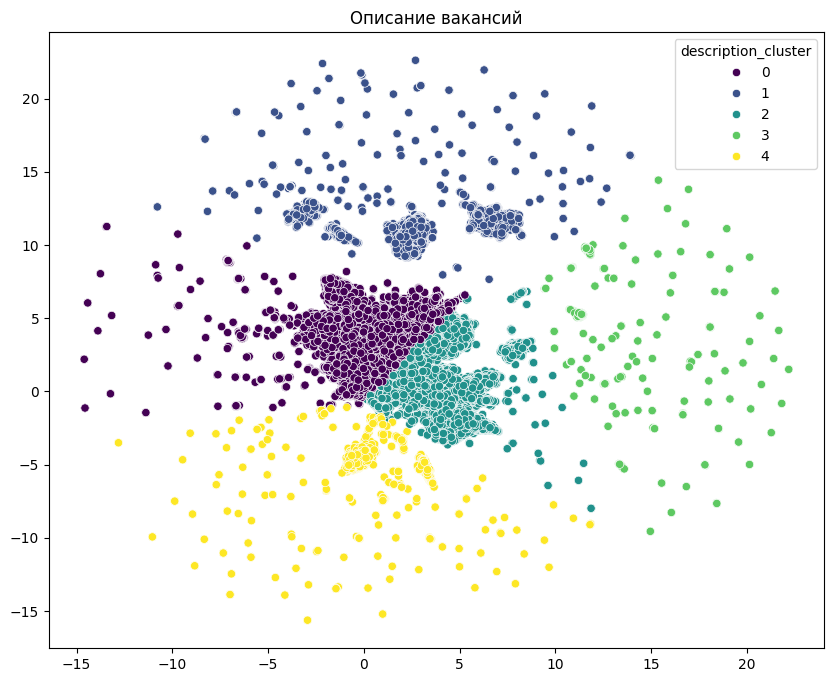

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=text_matrix_umap[:, 0], y=text_matrix_umap[:, 1], hue=df['description_cluster'], palette='viridis', legend='full')
plt.title('Описание вакансий')
plt.show()

In [ ]:
for cluster_id in range(5):
    sample_vacancies = df[df['description_cluster'] == cluster_id]
    print(f'\nКластер №{cluster_id}:')
    print(sample_vacancies['description'].sample(5))
    print(f"Длина: {len(sample_vacancies['description'])}")


Кластер №0:
529276    Группа компаний FIX — международный холдинг и ...
130824    Требования: • Среднее профессиональное (технич...
179316    Обязанности:  Индивидуальное обслуживание клие...
362061    Обязанности: формирование стратегии развития п...
402696    Обязанности: • Работа с корпоративными Клиента...
Name: description, dtype: object
Длина: 42643

Кластер №1:
170157    Должностные обязанности Организация эффективно...
419455    The Opportunity: As a company, we are committe...
579669    Мало проектов и интересных задач? Хотите профе...
463011    Обязанности: доработка конфигурации по требова...
378031    Project Description: Participating in SYCL com...
Name: description, dtype: object
Длина: 13628

Кластер №2:
433498    Тебе интересен VR? Хочешь работать над совреме...
314053    Требования: В/о (компьютерные и информационные...
333142    Обязанности: Контроль и технологическое развит...
543468    Мы ищем в наш сериал смелого и уверенного в св...
366073    Обязанности: web-ра

## Кластеризация по требуемым скиллам

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('russian') + stopwords.words('english'))
text_matrix = vectorizer.fit_transform(df['key_skills'])

svd = TruncatedSVD(n_components=50, random_state=42)
text_matrix_svd = svd.fit_transform(text_matrix)

UMAP = umap.UMAP(n_components=2, random_state=42)
text_matrix_umap = UMAP.fit_transform(text_matrix_svd)

kmeans = KMeans(n_clusters=5, random_state=42)
df['skills_cluster'] = kmeans.fit_predict(text_matrix_umap)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


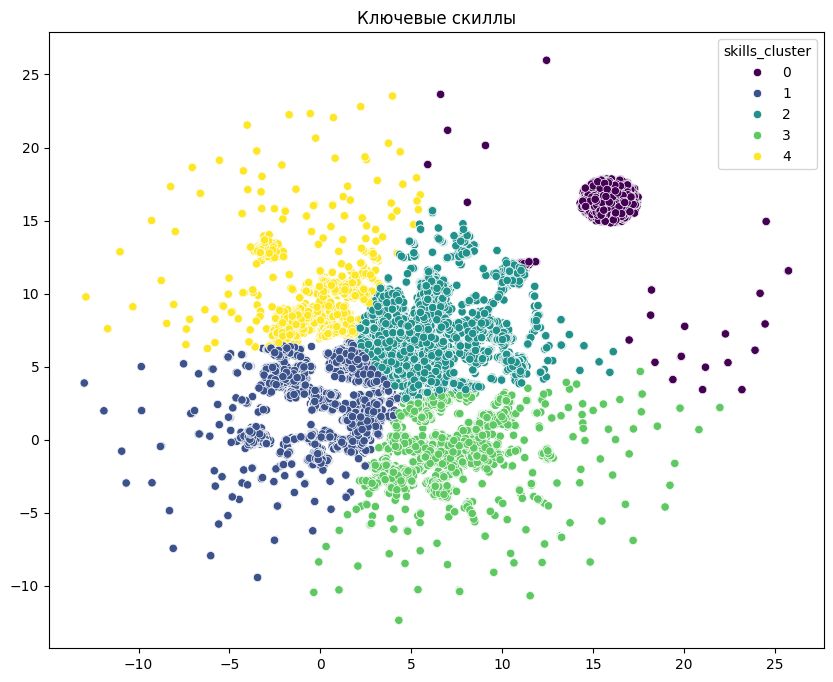

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=text_matrix_umap[:, 0], y=text_matrix_umap[:, 1], hue=df['skills_cluster'], palette='viridis', legend='full')
plt.title('Ключевые скиллы')
plt.show()

In [ ]:
for cluster_id in range(5):
    sample_vacancies = df[df['skills_cluster'] == cluster_id]
    print(f'\nКластер №{cluster_id}:')
    print(sample_vacancies['key_skills'].sample(5))
    print(f"Длина: {len(sample_vacancies['key_skills'])}")


Кластер №0:
154851    
2896      
251240    
411024    
461699    
Name: key_skills, dtype: object
Длина: 27436

Кластер №1:
342084    Грамотная речь Грамотность Английский язык SMM...
260259    Информационные технологии Управление временем ...
536266    Телефонные переговоры Ведение переговоров Дело...
377801    B2B Продажи Холодные продажи Активные продажи ...
147601    B2B Продажи Активные продажи Холодные продажи ...
Name: key_skills, dtype: object
Длина: 18207

Кластер №2:
311173    Постановка задач разработчикам Системный подхо...
572472                                      ABAP SAP MS SQL
328620        Работа в команде Материальная ответственность
548265                     Ответственность Работа в команде
163659    BPMN SQL Atlassian Jira Scrum Agile Project Ma...
Name: key_skills, dtype: object
Длина: 27773

Кластер №3:
325271        Ремонт ПК Настройка ПК Сборка ПК Настройка ПО
492438    HTML5 CSS3 HTML PHP5 jQuery MySQL JavaScript C...
486849    Delphi ORACLE Databases SQL 